# Сверточные нейронные сети 2 (ноутбук)

> Узнаем продвинутые подходы, которые улучшают качество и обучение сверточных нейронных сетей. Знакомимся с предобученными нейронными сетями.

### Нормализация входных данных

Хорошая практика в глубинном обучении - нормализовать входные данные.

In [1]:
import torch
import numpy as np

from torchvision.datasets import MNIST
import torchvision.transforms.v2 as T

In [2]:
mnist_train = MNIST('../datasets/mnist', transform=T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)]), download=True)

In [3]:
mnist_train.data.shape

torch.Size([60000, 28, 28])

In [4]:
mnist_train.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [5]:
mnist_train.data.max()

tensor(255, dtype=torch.uint8)

In [6]:
mean = mnist_train.data.to(torch.float32).mean().item() / 255

mean

0.13066047219669116

In [7]:
std = mnist_train.data.to(torch.float32).std().item() / 255

std

0.30810780244715075

In [8]:
normalize = T.Normalize(mean=(mean,), std=(std,))

In [9]:
mnist_train[0][0]

Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [10]:
normalized_image = normalize(mnist_train[0][0])

In [11]:
normalized_image

Image([[[-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
         -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
         -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
         -0.4241, -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
         -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
         -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
         -0.4241, -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
         -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
         -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
         -0.4241, -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
         -0.4241, -0.4241, -0.4241, -0.4241, -0.4241

In [12]:
normalized_image.mean()

tensor(0.0228)

In [13]:
normalized_image.std()

tensor(1.0144)

In [14]:
normalize(mnist_train.data.to(torch.float32) / 255).mean()

tensor(2.2836e-08)

In [15]:
normalize(mnist_train.data.to(torch.float32) / 255).std()

tensor(1.0000)

## Аугментация данных

https://pytorch.org/vision/stable/transforms.html

https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

## Практическая часть с применением клевых штук

In [16]:
from torchvision.datasets import CIFAR10

In [17]:
dataset_train = CIFAR10('../datasets/cifar', train=True, download=True)

Files already downloaded and verified


In [18]:
dataset_train.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

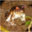

In [19]:
dataset_train[0][0]

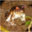

In [20]:
dataset_train[0][0]

In [21]:
import matplotlib.pyplot as plt

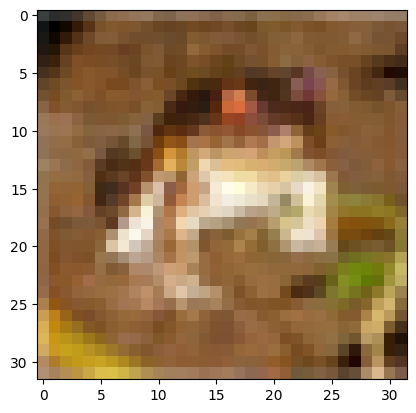

In [22]:
plt.imshow(dataset_train[0][0])
plt.show()

In [23]:
img_matrix = np.array(dataset_train[0][0]) / 255

img_matrix.shape

(32, 32, 3)

In [24]:
dataset_train = CIFAR10('../datasets/cifar', train=True, transform=T.ToTensor())

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [25]:
dataset_train.data.shape

(50000, 32, 32, 3)

In [26]:
means = (dataset_train.data / 255).mean(axis=(0, 1, 2))

means

array([0.49139968, 0.48215841, 0.44653091])

In [27]:
stds = (dataset_train.data / 255).std(axis=(0, 1, 2))

stds

array([0.24703223, 0.24348513, 0.26158784])

In [28]:
import torchvision.transforms as T


transforms = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(mean=means, std=stds)
    ]
)

In [29]:
from torch.utils.data import DataLoader


train_dataset = CIFAR10('../datasets/cifar', train=True, transform=transforms)
valid_dataset = CIFAR10('../datasets/cifar', train=False, transform=transforms)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=8, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=128, shuffle=False, num_workers=8, pin_memory=True)

In [30]:
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Optimizer
from tqdm import tqdm


def train(model: nn.Module, data_loader: DataLoader, optimizer: Optimizer, loss_fn, device: torch.device):
    model.train()

    total_loss = 0
    total_correct = 0

    for x, y in tqdm(data_loader):
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        loss.backward()

        total_loss += loss.item()
        
        total_correct += (output.argmax(dim=1) == y).sum().item()

        optimizer.step()

    return total_loss / len(data_loader), total_correct / len(data_loader.dataset)


In [31]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader


@torch.inference_mode()
def evaluate(model: nn.Module, data_loader: DataLoader, loss_fn, device: torch.device):
    model.eval()

    total_loss = 0
    total_correct = 0

    for x, y in tqdm(data_loader):
        x, y = x.to(device), y.to(device)

        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()

        total_correct += (output.argmax(dim=1) == y).sum().item()

    return total_loss / len(data_loader), total_correct / len(data_loader.dataset)


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='darkgrid')


def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    train_accuracy: list[float],
    valid_accuracy: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')
    plt.legend()

    plt.show()
    
    plt.figure(figsize=(16, 8))

    plt.title(title + ' accuracy')

    plt.plot(train_accuracy, label='Train accuracy')
    plt.plot(valid_accuracy, label='Valid accuracy')
    plt.legend()

    plt.show()

In [33]:
from IPython.display import clear_output


def fit(model, train_loader, valid_loader, optimizer, loss_fn, device, num_epochs, title):
    train_loss_history, valid_loss_history = [], []
    train_accuracy_history, valid_accuracy_history = [], []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train(model, train_loader, optimizer, loss_fn, device)
        valid_loss, valid_accuracy = evaluate(model, valid_loader, loss_fn, device)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)
        
        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)

        clear_output()

        plot_stats(
            train_loss_history, valid_loss_history,
            train_accuracy_history, valid_accuracy_history,
            title
        )

        torch.save(model.state_dict(), f"checkpoints/model_{epoch}.pt")
        torch.save(optimizer.state_dict(), f"checkpoints/optimizer_{epoch}.pt")

## Модели

In [41]:
from torch import nn


class FirstModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),  # 32 x 32 x 16
            nn.ReLU(),

            nn.MaxPool2d(2),  # 16 x 16 x 16

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),  # 16 x 16 x 32
            nn.ReLU(),

            nn.MaxPool2d(2),  # 8 x 8 x 32

            nn.Flatten(),

            nn.Linear(8 * 8 * 32, 1024),
            nn.ReLU(),
            nn.Linear(1024, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

In [42]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)
print(torch.cuda.get_device_name())

loss_fn = nn.CrossEntropyLoss()

cuda:0
NVIDIA GeForce RTX 4090


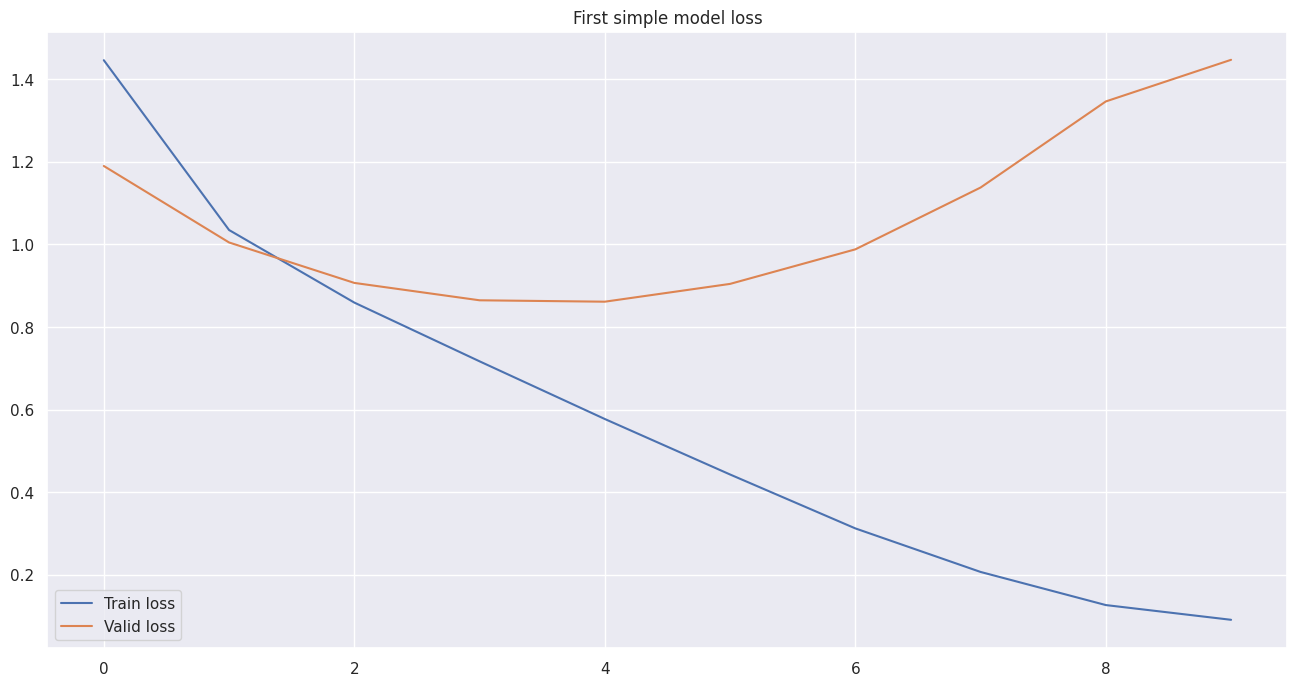

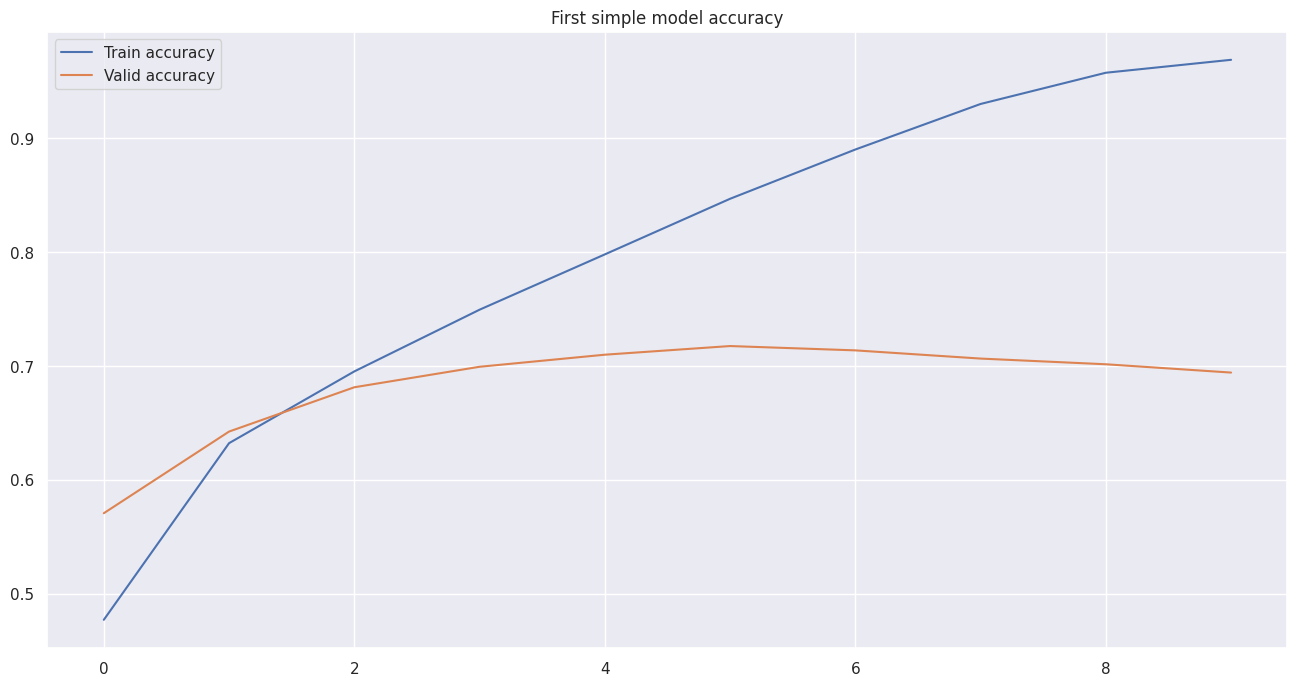

In [57]:
from torch.optim import Adam


model = FirstModel().to(device)

optimizer = Adam(model.parameters(), lr=1e-3)

fit(model, train_loader, valid_loader, optimizer, loss_fn, device, 10, 'First simple model')

In [44]:
model, optimizer

(FirstModel(
   (net): Sequential(
     (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (4): ReLU()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Flatten(start_dim=1, end_dim=-1)
     (7): Linear(in_features=2048, out_features=1024, bias=True)
     (8): ReLU()
     (9): Linear(in_features=1024, out_features=128, bias=True)
     (10): ReLU()
     (11): Linear(in_features=128, out_features=10, bias=True)
   )
 ),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [45]:
model = FirstModel().to(device)

optimizer = Adam(model.parameters(), lr=1e-3)

epoch = 7

model.load_state_dict(torch.load(f"checkpoints/model_{epoch}.pt"))
optimizer.load_state_dict(torch.load(f"checkpoints/optimizer_{epoch}.pt"))


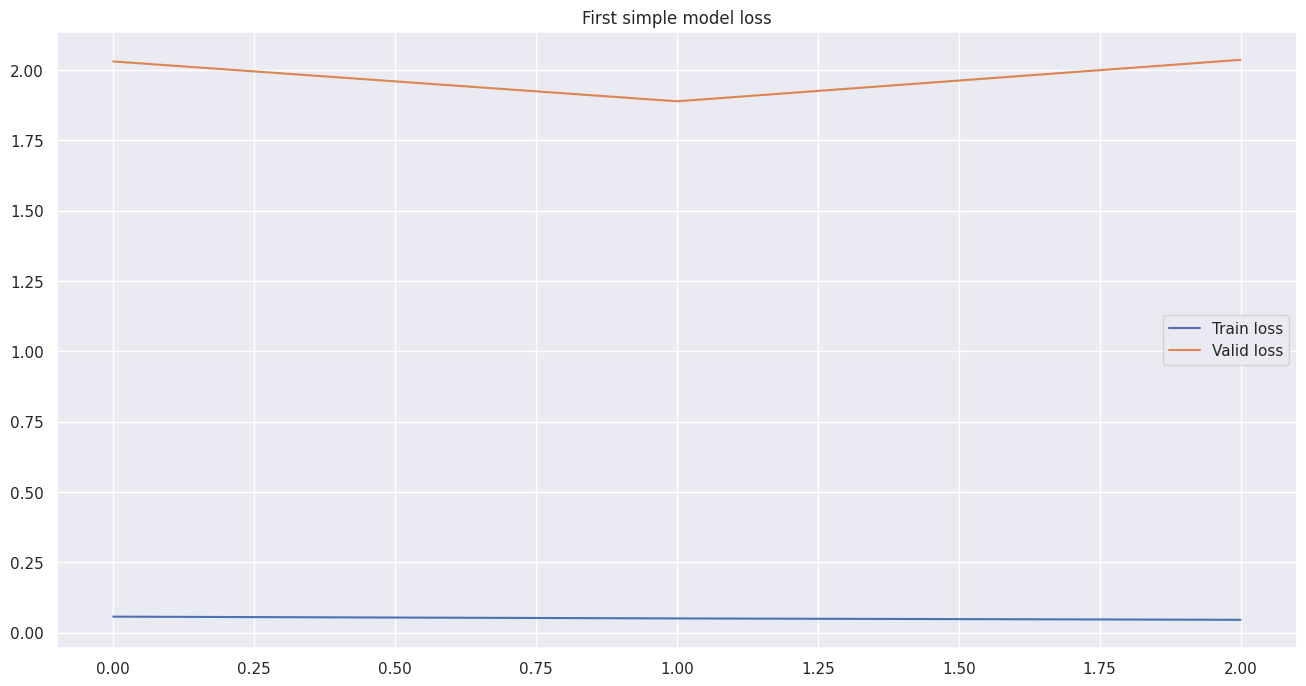

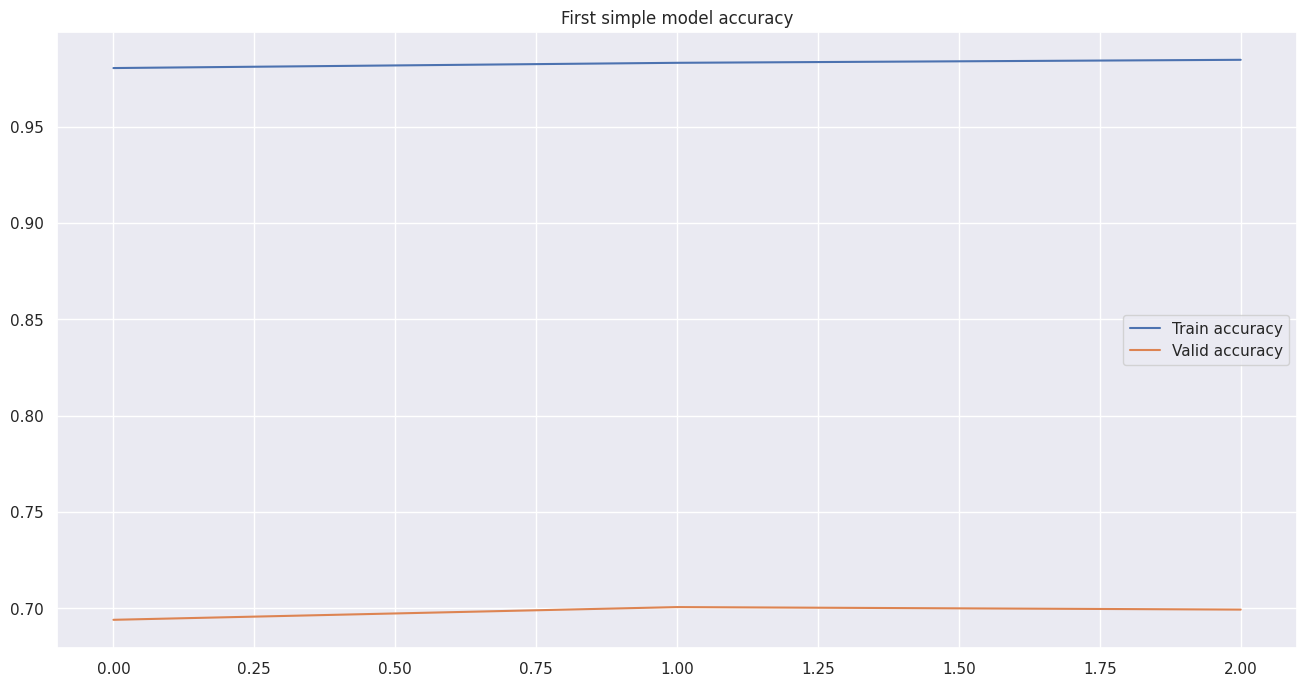

In [48]:
fit(model, train_loader, valid_loader, optimizer, loss_fn, device, 3, 'First simple model')

In [58]:
class SecondModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),  # 32 x 32 x 32
            nn.ReLU(),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),  # 32 x 32 x 32
            nn.ReLU(),

            nn.MaxPool2d(2),  # 16 x 16 x 32

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),  # 16 x 16 x 64
            nn.ReLU(),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),  # 16 x 16 x 64
            nn.ReLU(),

            nn.MaxPool2d(2),  # 8 x 8 x 64
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),  # 8 x 8 x 128
            nn.ReLU(),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),  # 8 x 8 x 128
            nn.ReLU(),

            nn.MaxPool2d(2),  # 4 x 4 x 128

            nn.Flatten(),

            nn.Linear(4 * 4 * 128, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.net(x)

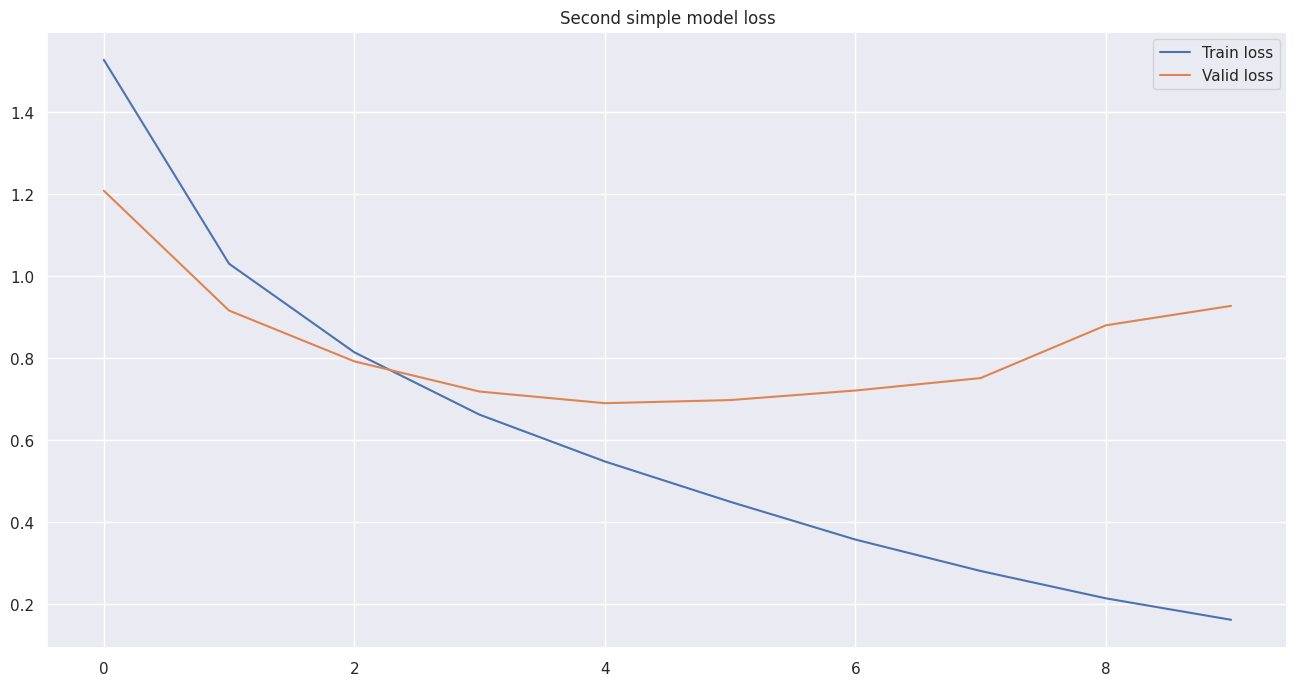

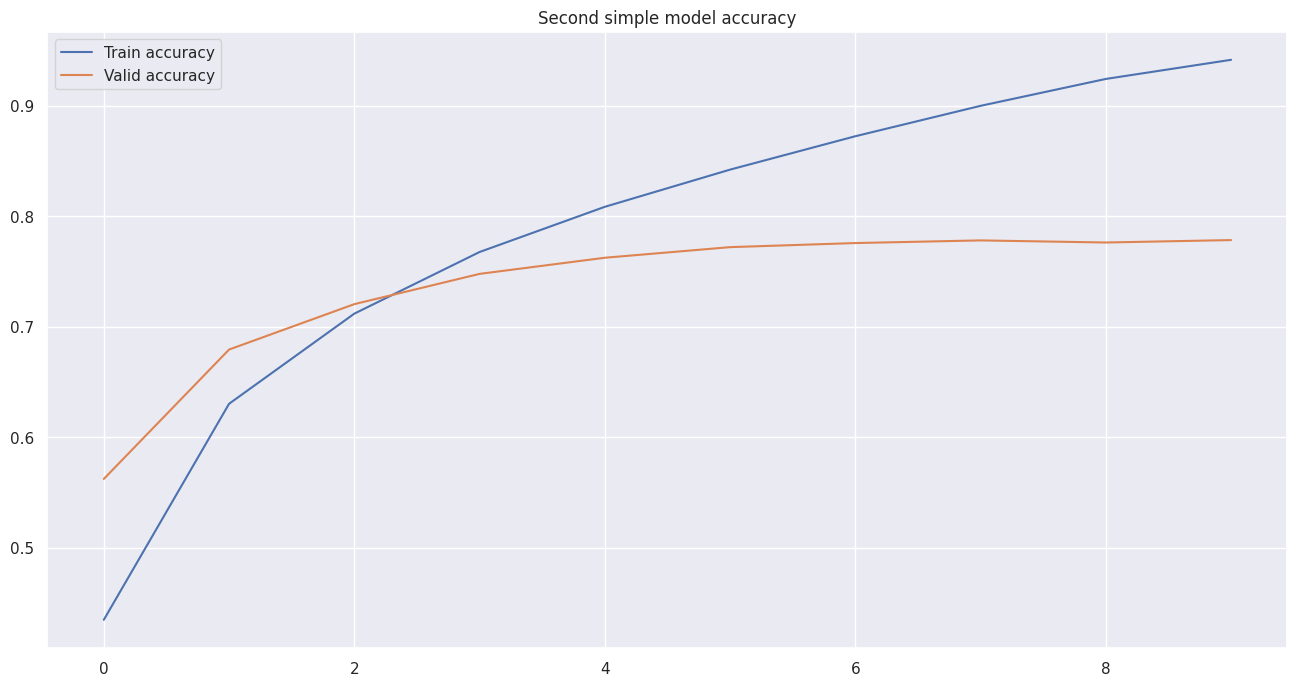

In [59]:
model = SecondModel().to(device)

optimizer = Adam(model.parameters(), lr=1e-3)

fit(model, train_loader, valid_loader, optimizer, loss_fn, device, 10, 'Second simple model')

In [60]:
class ThirdModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),  # 32 x 32 x 32
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),  # 32 x 32 x 32
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.MaxPool2d(2),  # 16 x 16 x 32

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),  # 16 x 16 x 64
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),  # 16 x 16 x 64
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.MaxPool2d(2),  # 8 x 8 x 64

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),  # 8 x 8 x 128
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),  # 8 x 8 x 128
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.MaxPool2d(2),  # 4 x 4 x 128

            nn.Flatten(),

            nn.Linear(4 * 4 * 128, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.net(x)

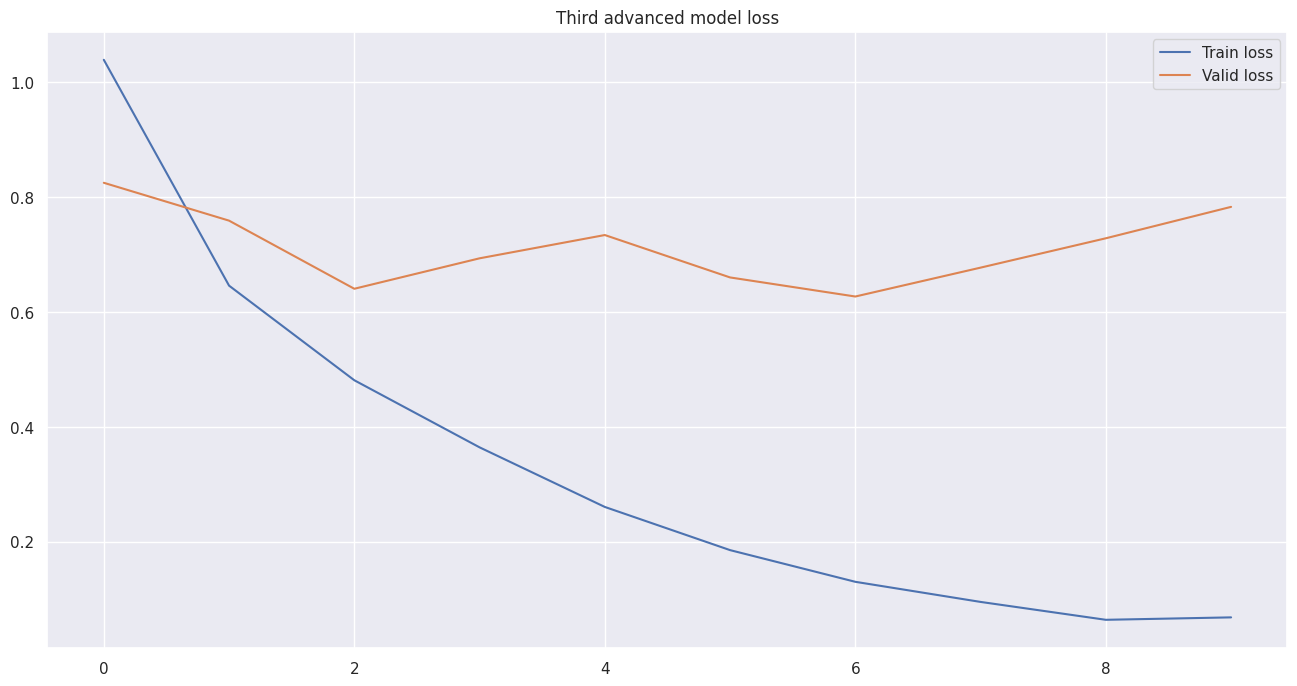

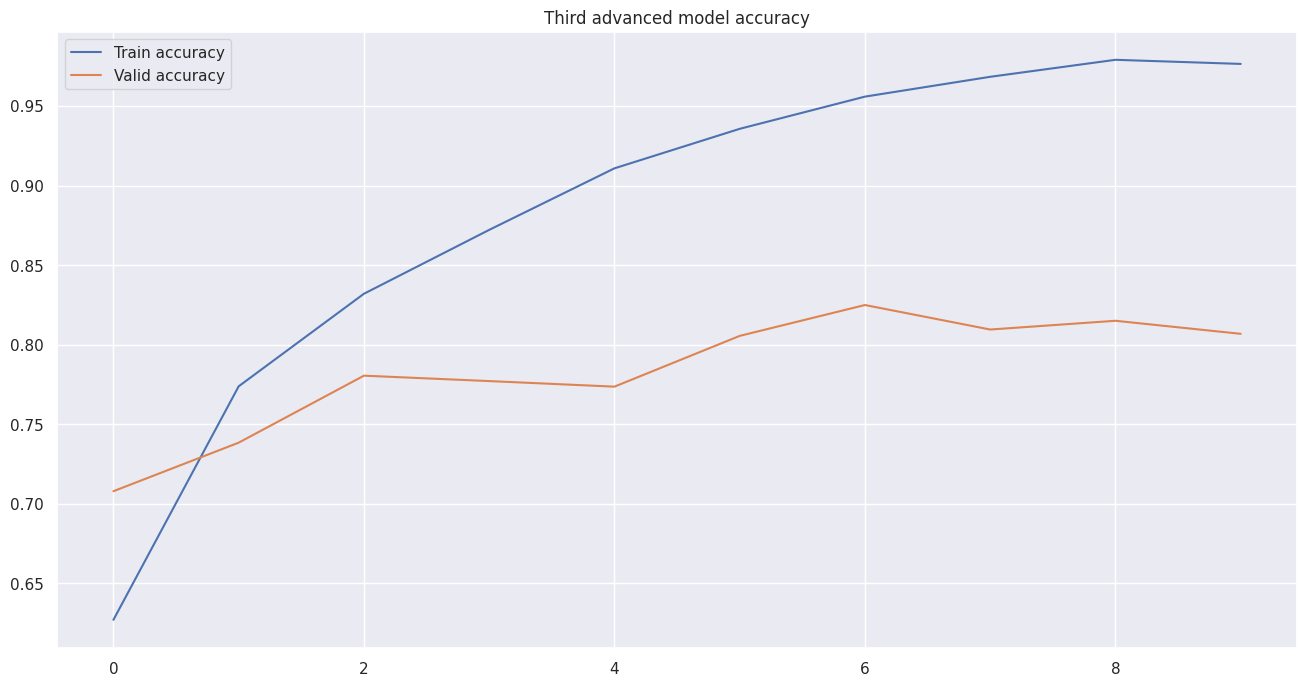

In [61]:
model = ThirdModel().to(device)

optimizer = Adam(model.parameters(), lr=1e-3)

fit(model, train_loader, valid_loader, optimizer, loss_fn, device, 10, 'Third advanced model')

In [62]:
class FourthModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),  # 32 x 32 x 32
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),  # 32 x 32 x 32
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.MaxPool2d(2),  # 16 x 16 x 32
            nn.Dropout2d(p=0.2),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),  # 16 x 16 x 64
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),  # 16 x 16 x 64
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.MaxPool2d(2),  # 8 x 8 x 32
            nn.Dropout2d(p=0.2),
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),  # 8 x 8 x 128
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),  # 8 x 8 x 128
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.MaxPool2d(2),  # 4 x 4 x 128
            nn.Dropout2d(p=0.2),

            nn.Flatten(),

            nn.Linear(4 * 4 * 128, 512),
            nn.BatchNorm1d(512),
            nn.Dropout(p=0.3),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.net(x)

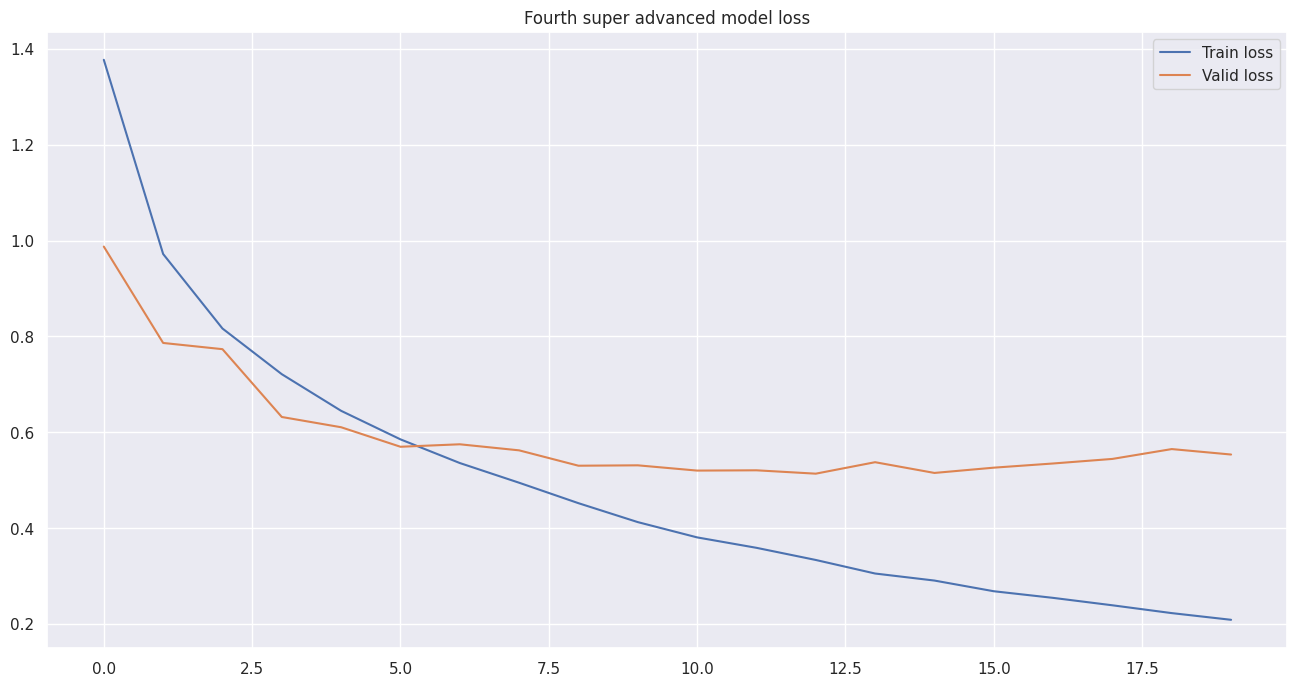

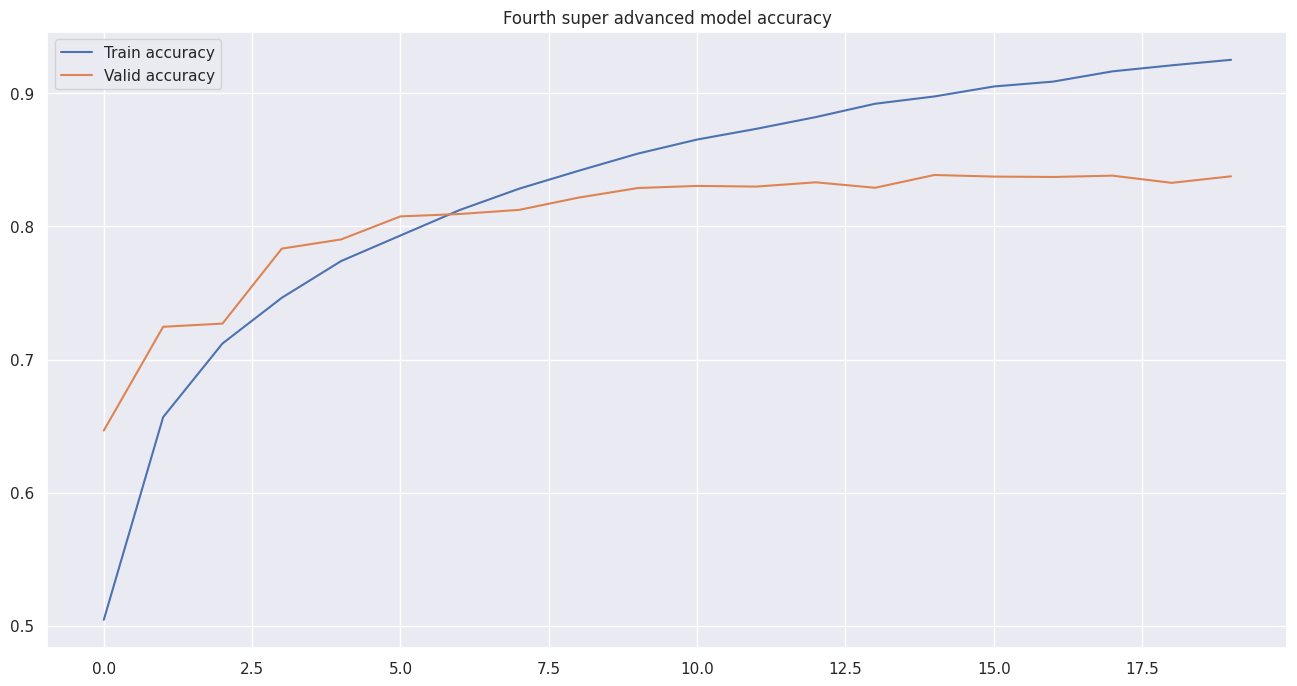

In [63]:
model = FourthModel().to(device)

optimizer = Adam(model.parameters(), lr=1e-3)

fit(model, train_loader, valid_loader, optimizer, loss_fn, device, 20, 'Fourth super advanced model')

In [64]:
train_transforms = T.Compose(
    [
        T.RandomResizedCrop(size=32, scale=(0.8, 1.1)),
        T.RandomHorizontalFlip(p=0.5),
        T.RandomAdjustSharpness(sharpness_factor=2),
        T.ToTensor(),
        T.Normalize(mean=means, std=stds)
    ]
)

test_transforms = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(mean=means, std=stds)
    ]
)

train_dataset = CIFAR10('../datasets/cifar', train=True, transform=train_transforms)
valid_dataset = CIFAR10('../datasets/cifar', train=False, transform=test_transforms)

train_loader_augs1 = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=8, pin_memory=True)
valid_loader_augs1 = DataLoader(valid_dataset, batch_size=128, shuffle=False, num_workers=8, pin_memory=True)

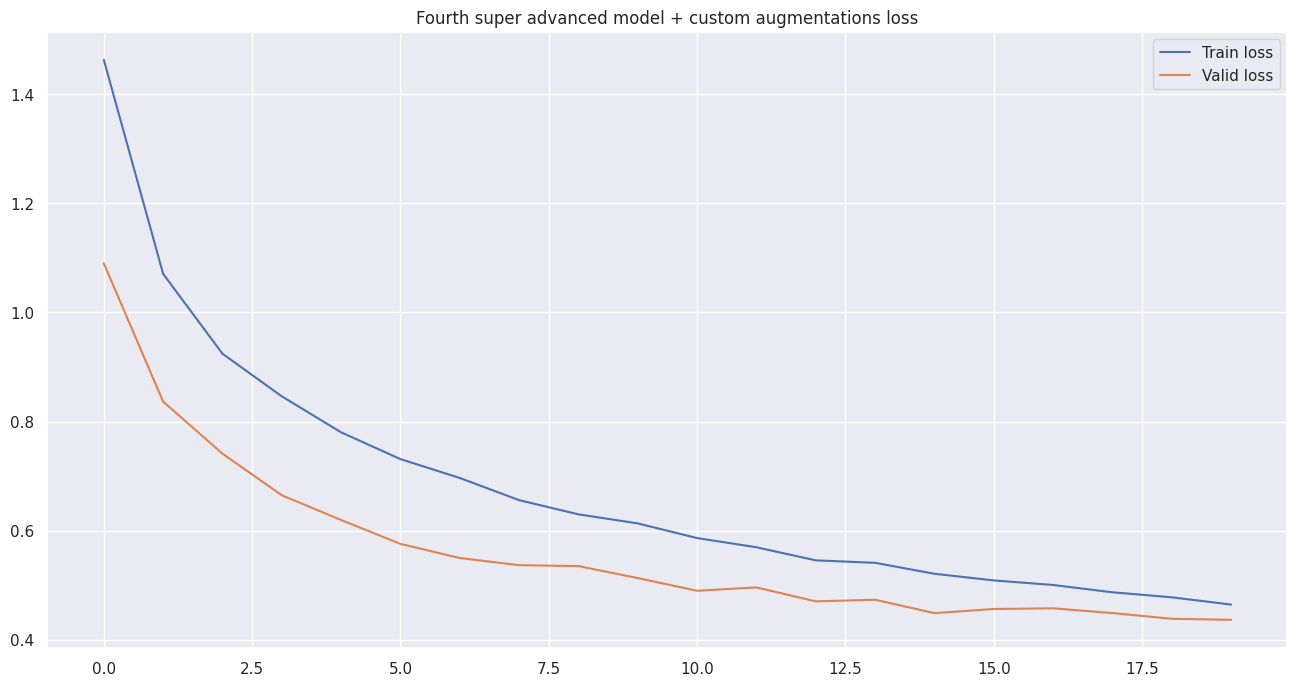

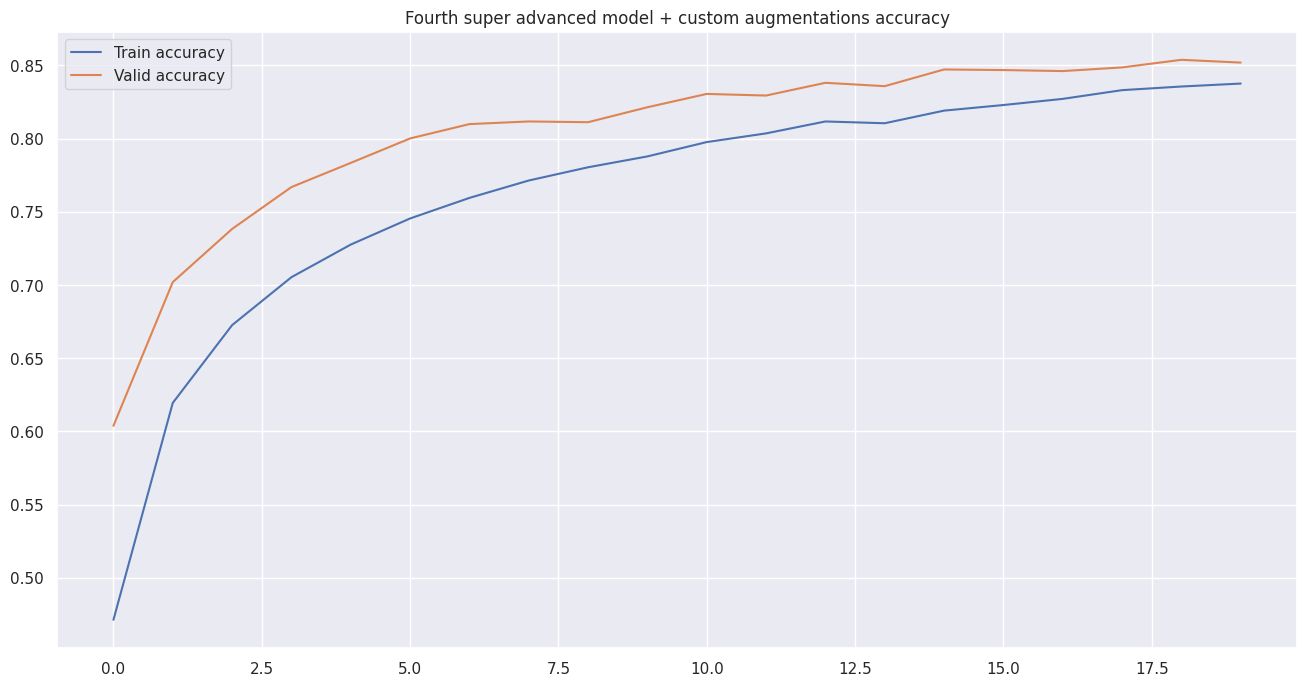

In [65]:
model = FourthModel().to(device)

optimizer = Adam(model.parameters(), lr=1e-3)

fit(
    model,
    train_loader_augs1, valid_loader_augs1,
    optimizer, loss_fn, device, 20, 'Fourth super advanced model + custom augmentations'
)

In [70]:
train_transforms = T.Compose(
    [
        T.RandAugment(),
        T.ToTensor(),
        T.Normalize(mean=means, std=stds)
    ]
)

test_transforms = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(mean=means, std=stds)
    ]
)

train_dataset = CIFAR10('../datasets/cifar', train=True, transform=train_transforms)
valid_dataset = CIFAR10('../datasets/cifar', train=False, transform=test_transforms)

train_loader_augs2 = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=8, pin_memory=True)
valid_loader_augs2 = DataLoader(valid_dataset, batch_size=128, shuffle=False, num_workers=8, pin_memory=True)

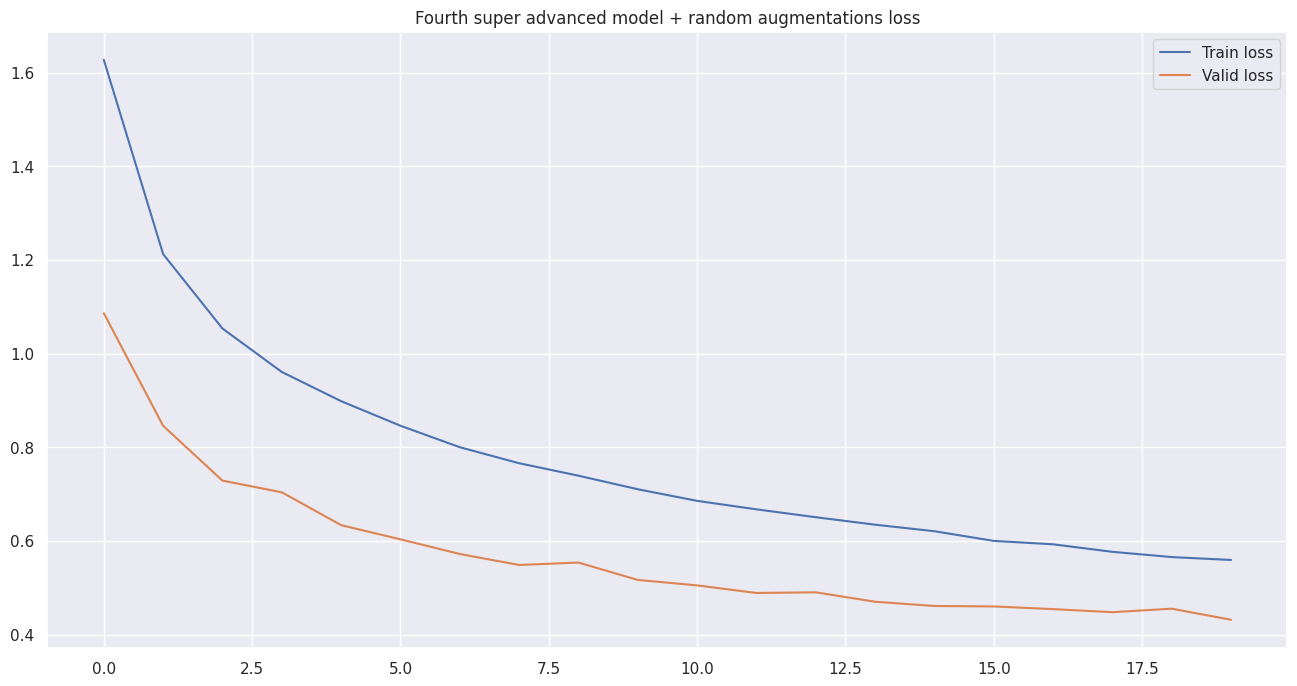

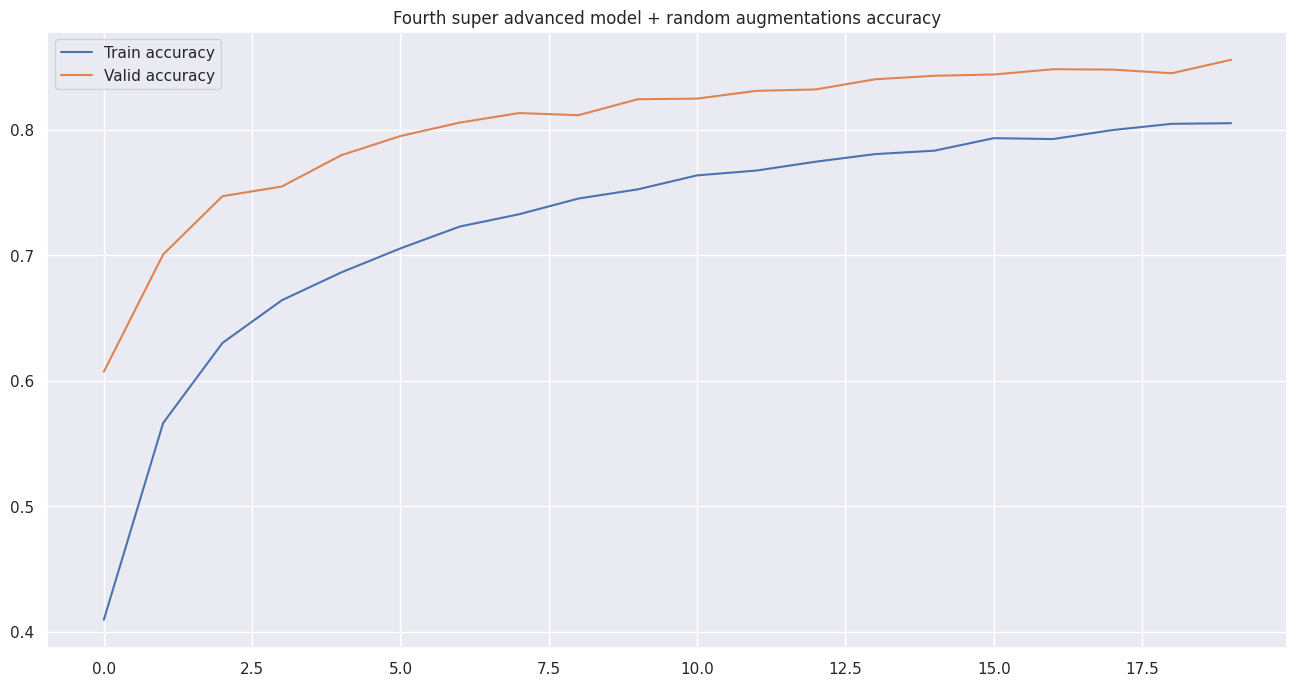

In [71]:
model = FourthModel().to(device)

optimizer = Adam(model.parameters(), lr=1e-3)

fit(
    model,
    train_loader_augs2, valid_loader_augs2,
    optimizer, loss_fn, device, 20, 'Fourth super advanced model + random augmentations'
)

In [ ]:
train_transforms = T.Compose(
    [
        T.AutoAugment(T.AutoAugmentPolicy.CIFAR10),
        T.ToTensor(),
        T.Normalize(mean=means, std=stds)
    ]
)

test_transforms = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(mean=means, std=stds)
    ]
)

train_dataset = CIFAR10('cifar', train=True, transform=train_transforms)
valid_dataset = CIFAR10('cifar', train=False, transform=test_transforms)

train_loader_augs3 = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=8, pin_memory=True)
valid_loader_augs3 = DataLoader(valid_dataset, batch_size=128, shuffle=False, num_workers=8, pin_memory=True)

In [ ]:
model = FourthModel().to(device)

optimizer = Adam(model.parameters(), lr=1e-3)

fit(
    model,
    train_loader_augs3, valid_loader_augs3,
    optimizer, loss_fn, device, 20, 'Fourth super advanced model + best learned augmentations'
)

In [76]:
# https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate

def fit(model, train_loader, valid_loader, optimizer, loss_fn, device, num_epochs, title, scheduler=None):
    train_loss_history, valid_loss_history = [], []
    train_accuracy_history, valid_accuracy_history = [], []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train(model, train_loader, optimizer, loss_fn, device)
        valid_loss, valid_accuracy = evaluate(model, valid_loader, loss_fn, device)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)
        
        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)

        clear_output()

        plot_stats(
            train_loss_history, valid_loss_history,
            train_accuracy_history, valid_accuracy_history,
            title
        )

        if scheduler is not None:
            scheduler.step()

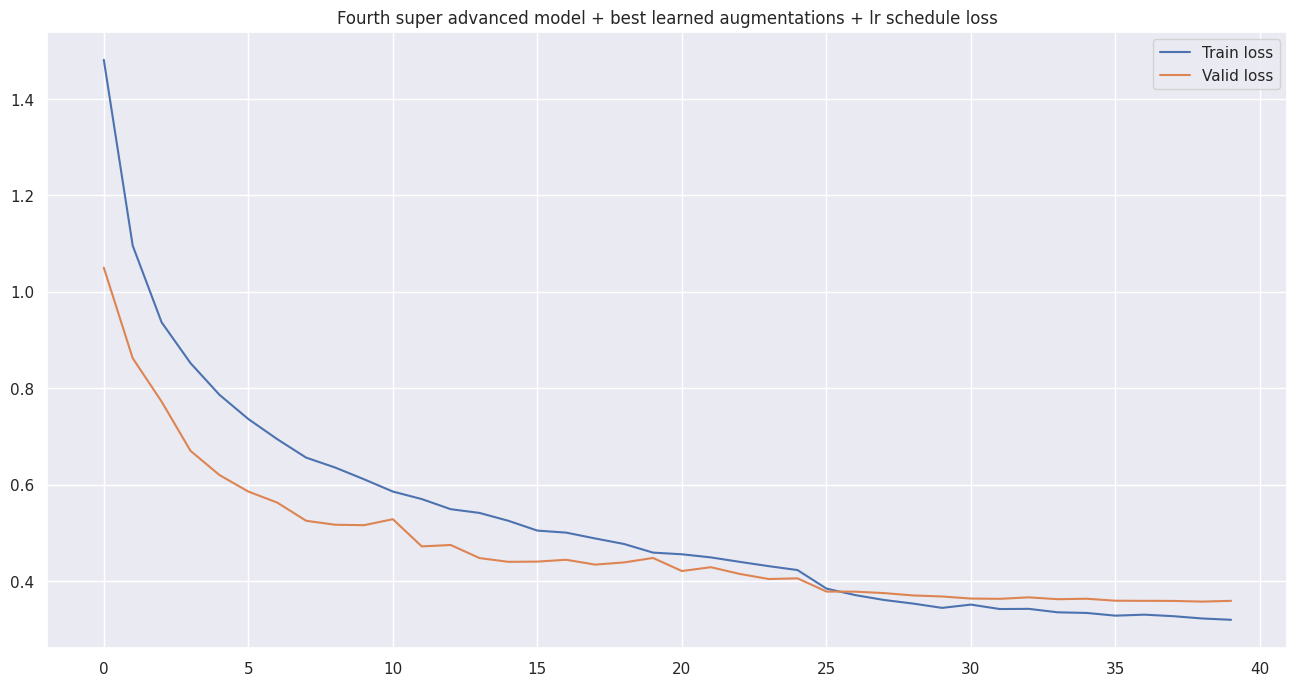

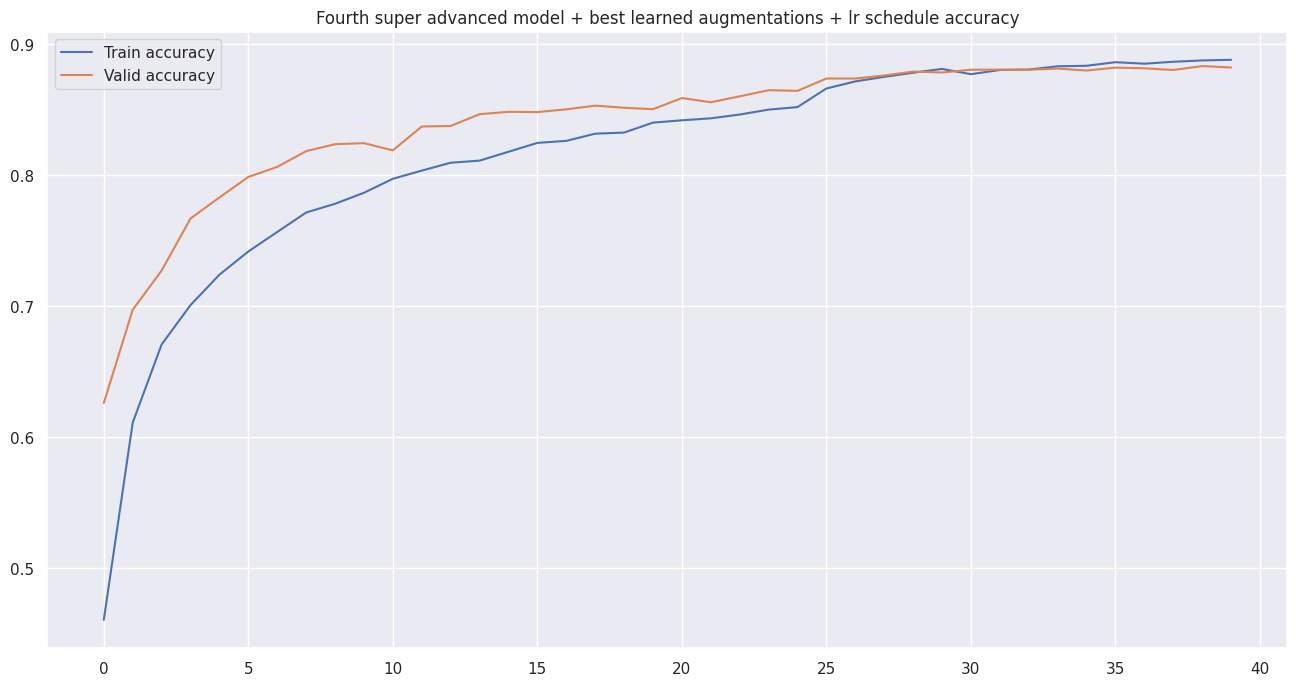

In [77]:
from torch.optim.lr_scheduler import StepLR

model = FourthModel().to(device)

optimizer = Adam(model.parameters(), lr=1e-3)

scheduler = StepLR(optimizer, step_size=25, gamma=0.1)

fit(
    model,
    train_loader_augs1, valid_loader_augs1,
    optimizer, loss_fn, device, 40, 'Fourth super advanced model + best learned augmentations + lr schedule', scheduler
)

In [78]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader


@torch.inference_mode()
def predict(model: nn.Module, loader: DataLoader, device: torch.device):
    model.eval()

    prediction = []

    for x, _ in tqdm(loader):
        output = model(x.to(device)).cpu()

        prediction.append(torch.argmax(output, dim=1))

    prediction = torch.cat(prediction)

    return prediction


In [79]:
def get_labels(loader):
    labels = []

    for _, y in tqdm(loader):
        labels.append(y)

    return torch.cat(labels, dim=0)

In [80]:
prediction = predict(model, valid_loader, device)
labels = get_labels(valid_loader)

100%|██████████| 79/79 [00:00<00:00, 282.67it/s]


In [81]:
prediction

tensor([3, 8, 8,  ..., 5, 1, 7])

In [82]:
labels

tensor([3, 8, 8,  ..., 5, 1, 7])

In [83]:
torch.mean((prediction == labels).to(torch.float32))

tensor(0.8821)

In [84]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader


@torch.inference_mode()
def predict_tta(model: nn.Module, loader: DataLoader, device: torch.device, iterations: int=2):
    model.eval()

    prediction = []

    for iteration in range(iterations):
        single_prediction = []

        for x, _ in tqdm(loader):
            output = model(x.to(device)).cpu()

            single_prediction.append(output)

        prediction.append(torch.vstack(single_prediction))

    prediction = torch.argmax(torch.mean(torch.stack(prediction), dim=0), dim=1)

    return prediction

In [85]:
transforms = T.Compose(
    [
        T.RandomResizedCrop(size=32, scale=(0.8, 1.2)),
        T.RandomHorizontalFlip(p=0.5),
        T.ToTensor(),
        T.Normalize(mean=means, std=stds)
    ]
)

valid_dataset = CIFAR10('../datasets/cifar', train=False, transform=transforms)

valid_loader_augs_tta = DataLoader(valid_dataset, batch_size=128, shuffle=False, num_workers=8, pin_memory=True)

In [88]:
prediction_tta = predict_tta(model, valid_loader_augs_tta, device, iterations=20)

100%|██████████| 79/79 [00:00<00:00, 179.04it/s]


In [89]:
torch.mean((prediction_tta == labels).to(torch.float32))

tensor(0.8932)

## Предобученные модели

In [34]:
# https://pytorch.org/vision/stable/models.html
from torchvision.models import alexnet
from torchvision.models import vgg11_bn
from torchvision.models import googlenet
from torchvision.models import resnet18

In [35]:
model = alexnet()

model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [36]:
sum(p.numel() for p in model.classifier.parameters())

58631144

In [37]:
model = vgg11_bn()

model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [38]:
sum(p.numel() for p in model.parameters())

132868840

In [39]:
model = googlenet(init_weights=False)

model

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [40]:
sum(p.numel() for p in model.parameters())

13004888

In [41]:
model = resnet18()

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [42]:
sum(p.numel() for p in model.parameters())

11689512

In [43]:
from torchvision.datasets import OxfordIIITPet

dataset = OxfordIIITPet('../datasets/pets', download=True)

In [44]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=394x500>, 0)

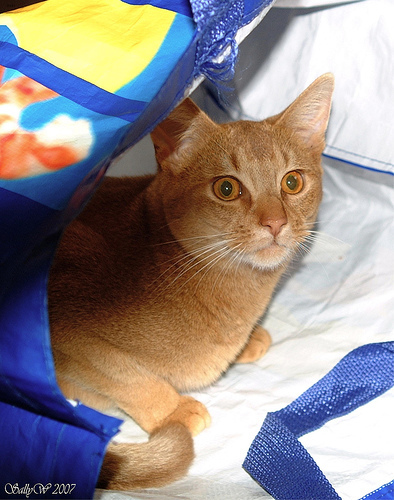

In [47]:
dataset[0][0]

In [45]:
len(dataset)

3680

In [46]:
dataset.classes

['Abyssinian',
 'American Bulldog',
 'American Pit Bull Terrier',
 'Basset Hound',
 'Beagle',
 'Bengal',
 'Birman',
 'Bombay',
 'Boxer',
 'British Shorthair',
 'Chihuahua',
 'Egyptian Mau',
 'English Cocker Spaniel',
 'English Setter',
 'German Shorthaired',
 'Great Pyrenees',
 'Havanese',
 'Japanese Chin',
 'Keeshond',
 'Leonberger',
 'Maine Coon',
 'Miniature Pinscher',
 'Newfoundland',
 'Persian',
 'Pomeranian',
 'Pug',
 'Ragdoll',
 'Russian Blue',
 'Saint Bernard',
 'Samoyed',
 'Scottish Terrier',
 'Shiba Inu',
 'Siamese',
 'Sphynx',
 'Staffordshire Bull Terrier',
 'Wheaten Terrier',
 'Yorkshire Terrier']

In [48]:
num_classes = len(dataset.classes)

num_classes

37

In [49]:
transform = T.Compose(
    [
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

train_dataset = OxfordIIITPet('../datasets/pets', transform=transform)
valid_dataset = OxfordIIITPet('../datasets/pets', transform=transform, split='test')

In [50]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=8, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=128, shuffle=False, num_workers=8, pin_memory=True)

In [52]:
from torchvision.models import AlexNet_Weights, ResNet18_Weights

In [54]:
model = alexnet()

In [57]:
next(iter(model.parameters()))

Parameter containing:
tensor([[[[ 1.1864e-01,  9.4069e-02,  9.5435e-02,  ...,  5.5822e-02,
            2.1575e-02,  4.9963e-02],
          [ 7.4882e-02,  3.8940e-02,  5.2979e-02,  ...,  2.5709e-02,
           -1.1299e-02,  4.1590e-03],
          [ 7.5425e-02,  3.8779e-02,  5.4930e-02,  ...,  4.3596e-02,
            1.0225e-02,  1.3251e-02],
          ...,
          [ 9.3155e-02,  1.0374e-01,  6.7547e-02,  ..., -2.0277e-01,
           -1.2839e-01, -1.1220e-01],
          [ 4.3544e-02,  6.4916e-02,  3.6164e-02,  ..., -2.0248e-01,
           -1.1376e-01, -1.0719e-01],
          [ 4.7369e-02,  6.2543e-02,  2.4758e-02,  ..., -1.1844e-01,
           -9.5567e-02, -8.3890e-02]],

         [[-7.2634e-02, -5.7996e-02, -8.0661e-02,  ..., -6.0304e-04,
           -2.5309e-02,  2.5471e-02],
          [-6.9042e-02, -6.7562e-02, -7.6367e-02,  ..., -3.9616e-03,
           -3.0402e-02,  1.0477e-02],
          [-9.9517e-02, -8.5592e-02, -1.0521e-01,  ..., -2.6587e-02,
           -2.2777e-02,  6.6451e-03]

In [71]:
model = alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)

model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [72]:
model.classifier[6] = nn.Linear(in_features=4096, out_features=num_classes)

model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [74]:
sum(p.numel() for p in model.features.parameters())

2469696

In [75]:
sum(p.numel() for p in model.classifier.parameters())

54685733

In [60]:
device = torch.device("cuda:0")

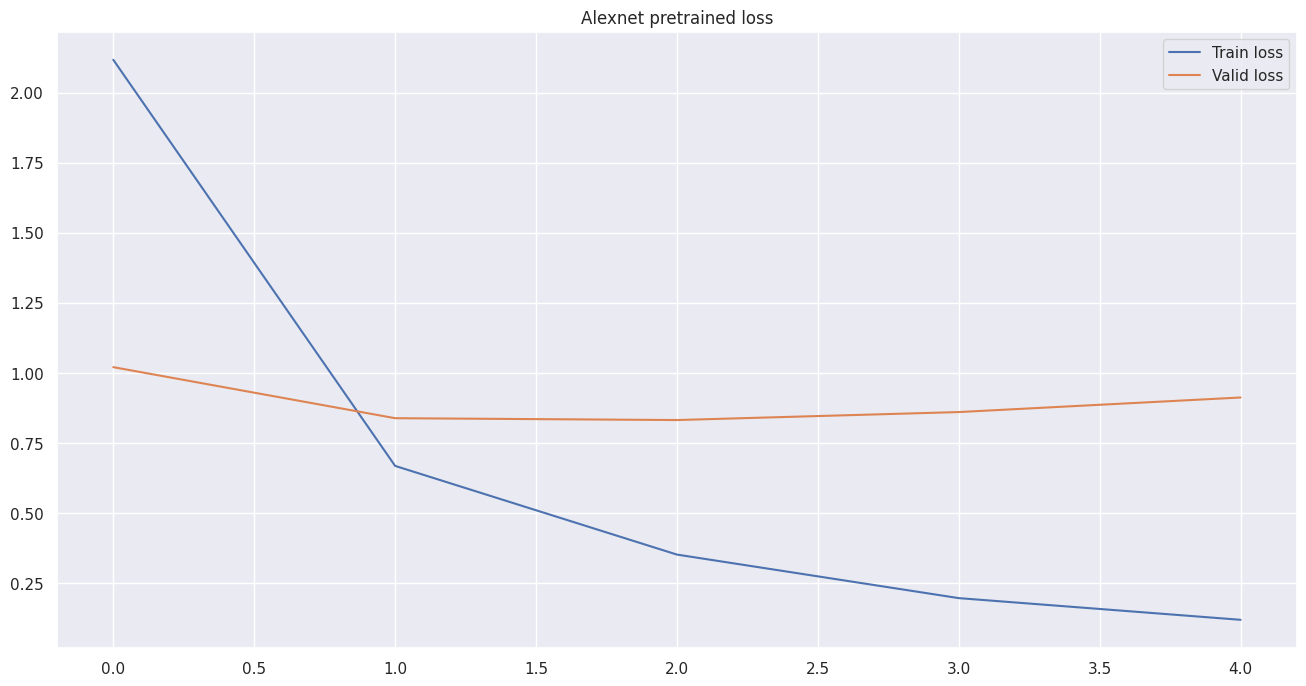

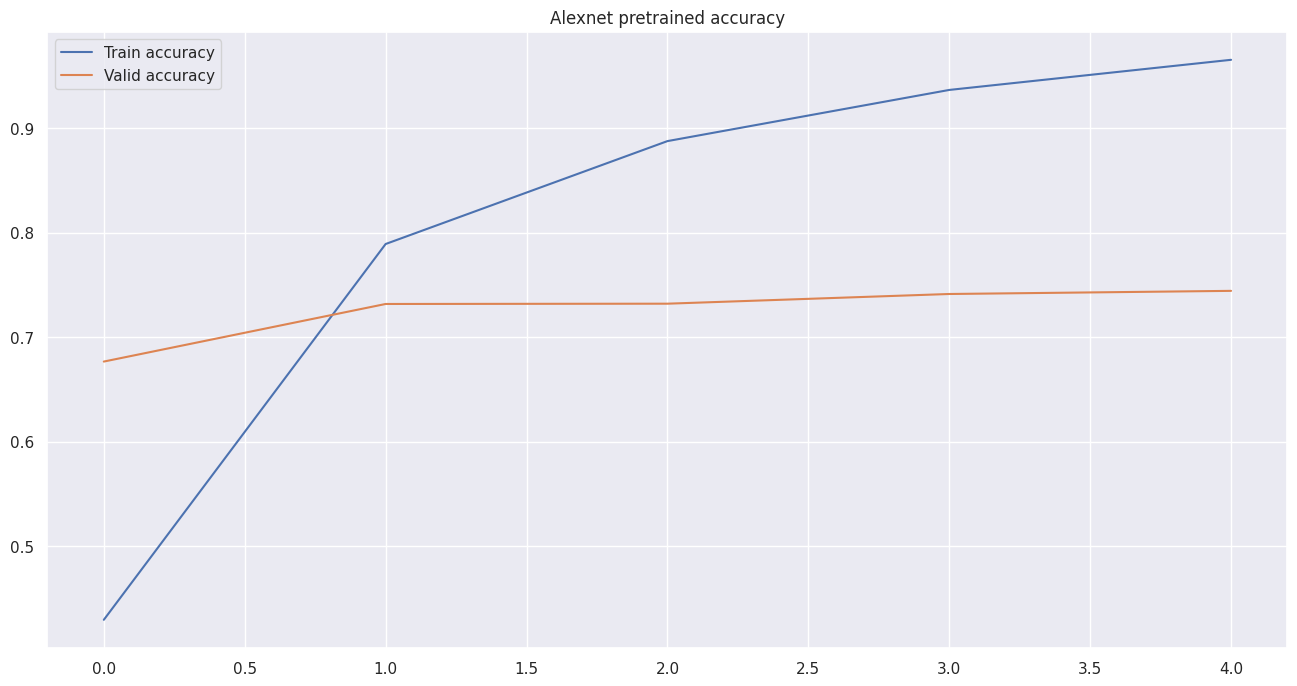

In [73]:
from torch.optim import Adam

loss_fn = torch.nn.CrossEntropyLoss()

model = model.to(device)

model.features.requires_grad_(False)
model.features[8].requires_grad_(True)
model.features[10].requires_grad_(True)

optimizer = Adam([p for p in model.parameters() if p.requires_grad], lr=1e-4)

fit(
    model,
    train_loader, valid_loader,
    optimizer, loss_fn, device, 5, 'Alexnet pretrained'
)

In [69]:
model = alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
model.requires_grad_(False)
model.classifier[6] = nn.Linear(in_features=4096, out_features=num_classes)

model = model.to(device)

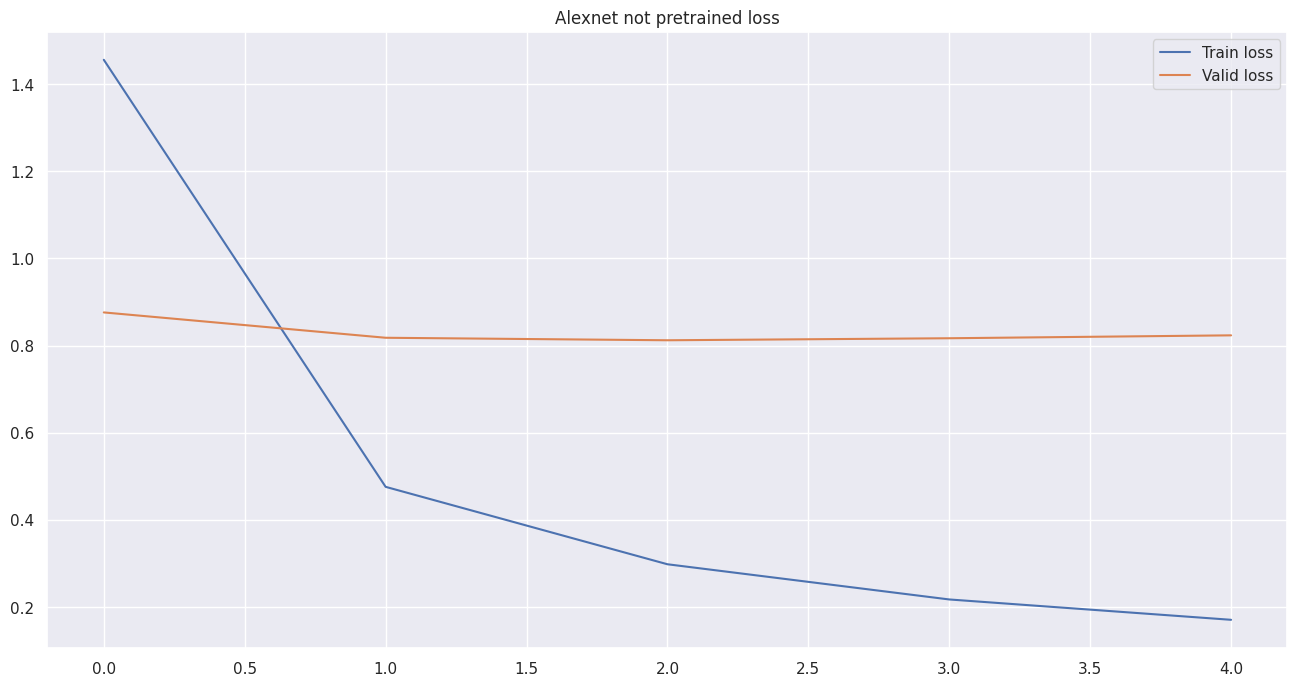

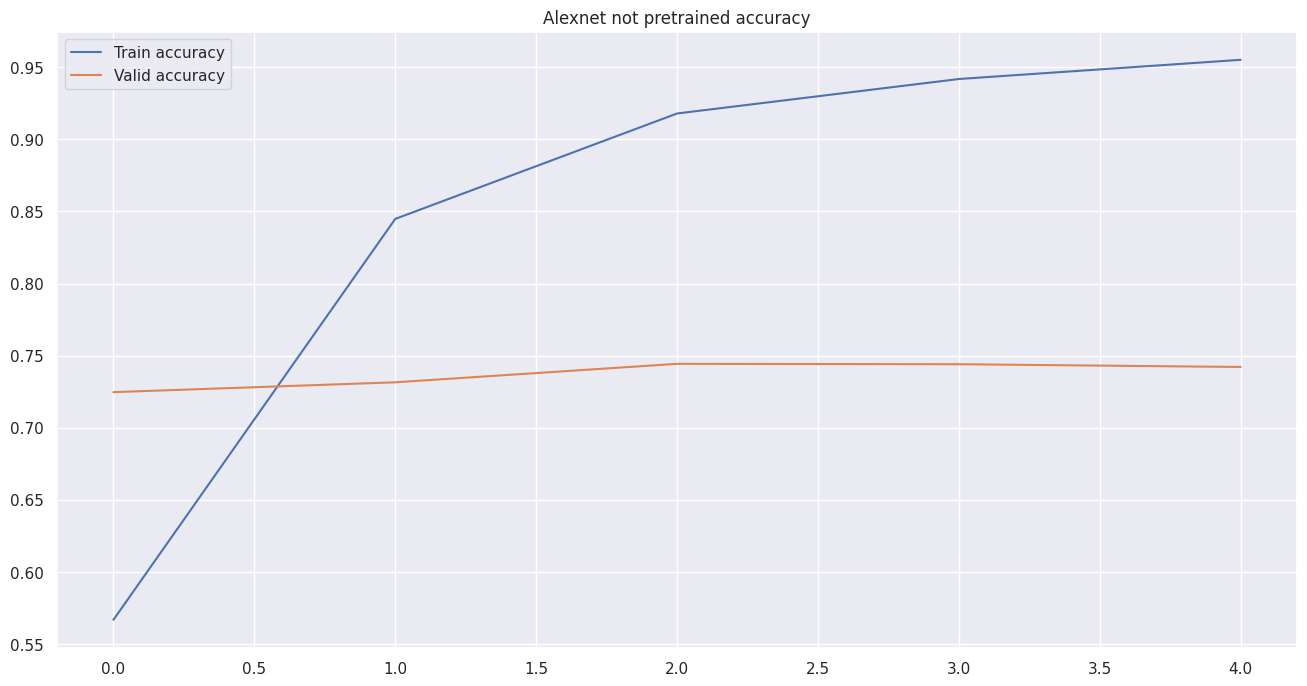

In [70]:
optimizer = Adam([p for p in model.parameters() if p.requires_grad], lr=1e-3)

fit(
    model,
    train_loader, valid_loader,
    optimizer, loss_fn, device, 5, 'Alexnet not pretrained'
)

In [82]:
model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [83]:
model.fc = nn.Linear(in_features=512, out_features=num_classes)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

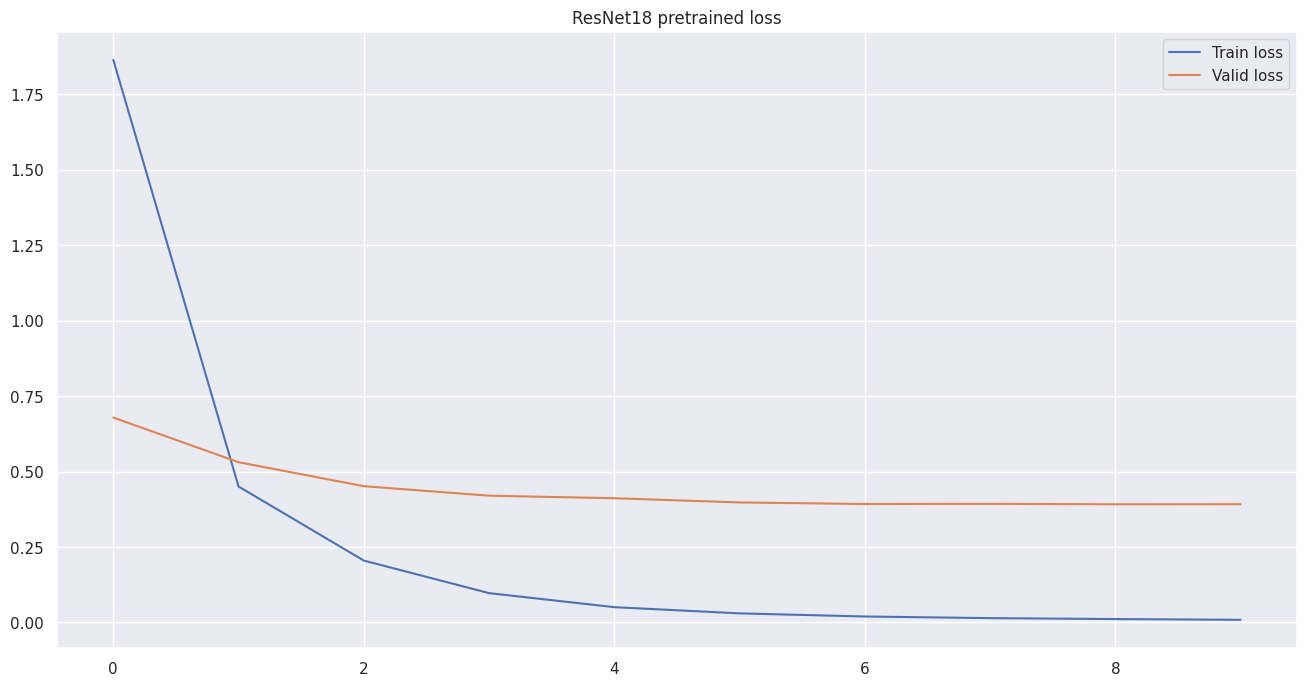

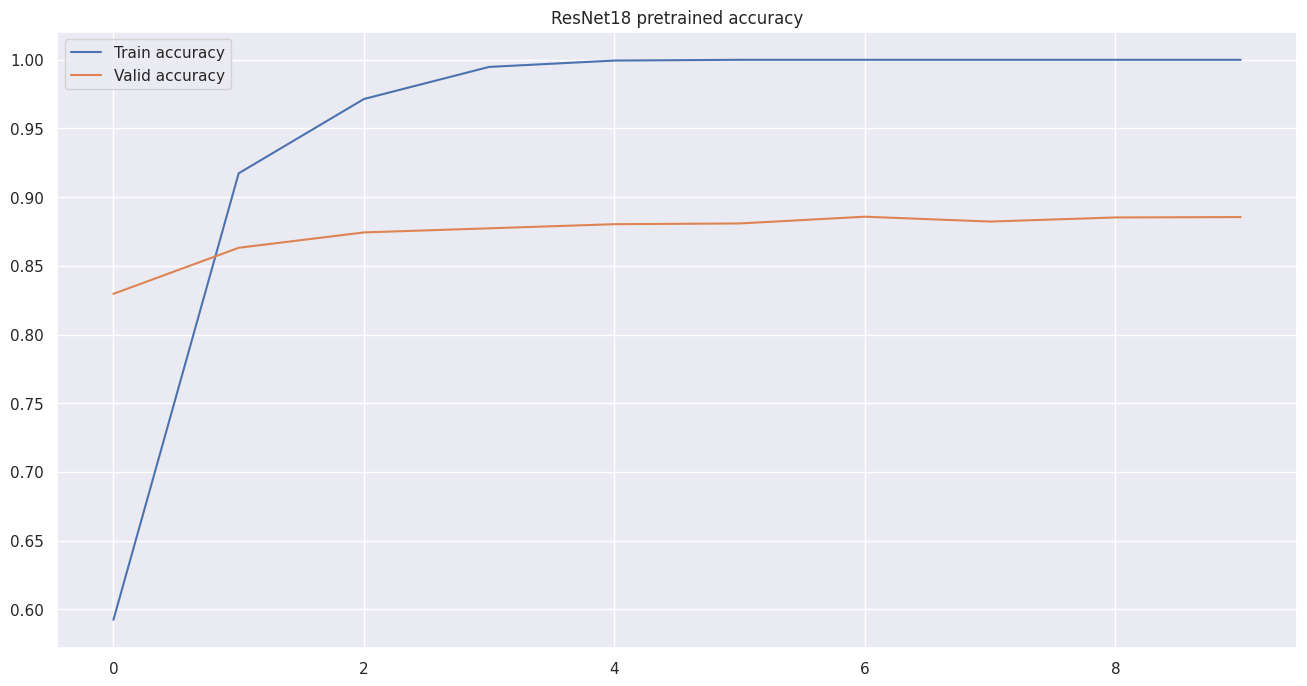

In [84]:
model = model.to(device)

model.requires_grad_(False)
model.layer4.requires_grad_(True)
model.fc.requires_grad_(True)

# optimizer = Adam([p for p in model.parameters() if p.requires_grad], lr=1e-3)

optimizer = Adam(
    [
        {'params': model.fc.parameters(), 'lr': 1e-3},
        {'params': model.layer4.parameters(), 'lr': 1e-4}
    ]
)

fit(
    model,
    train_loader, valid_loader,
    optimizer, loss_fn, device, 10, 'ResNet18 pretrained'
)

In [85]:
model = resnet18()

model.fc = nn.Linear(in_features=512, out_features=num_classes)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

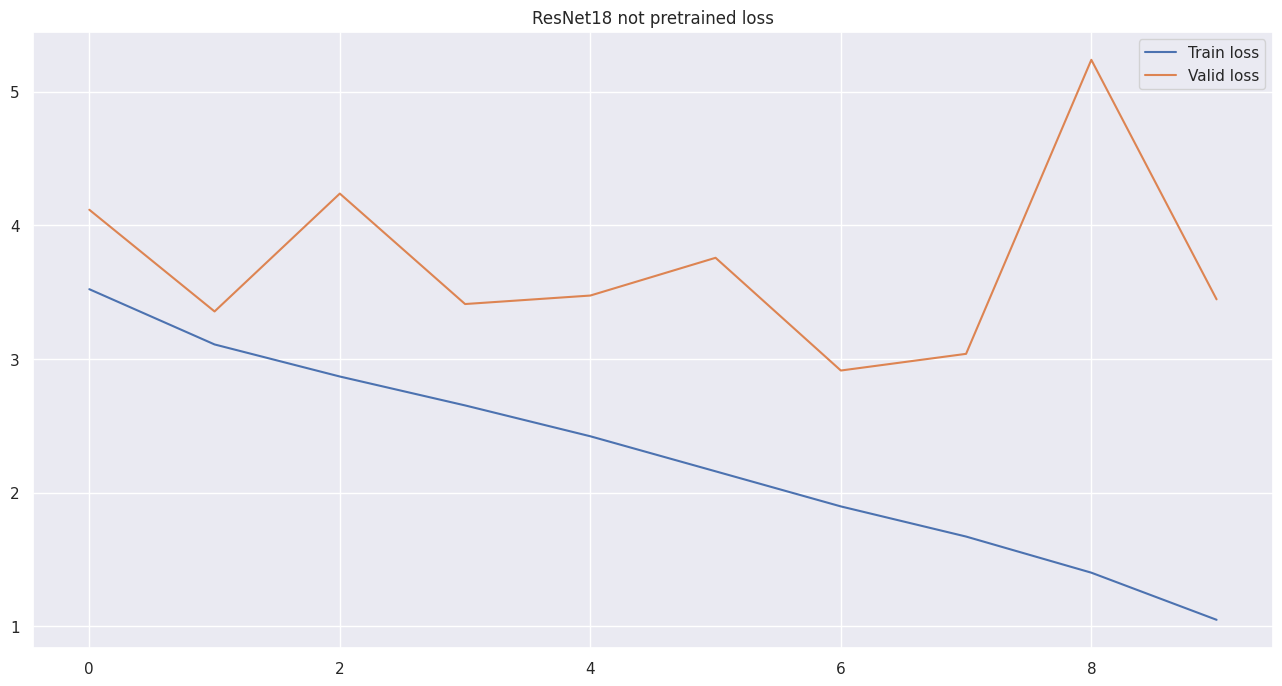

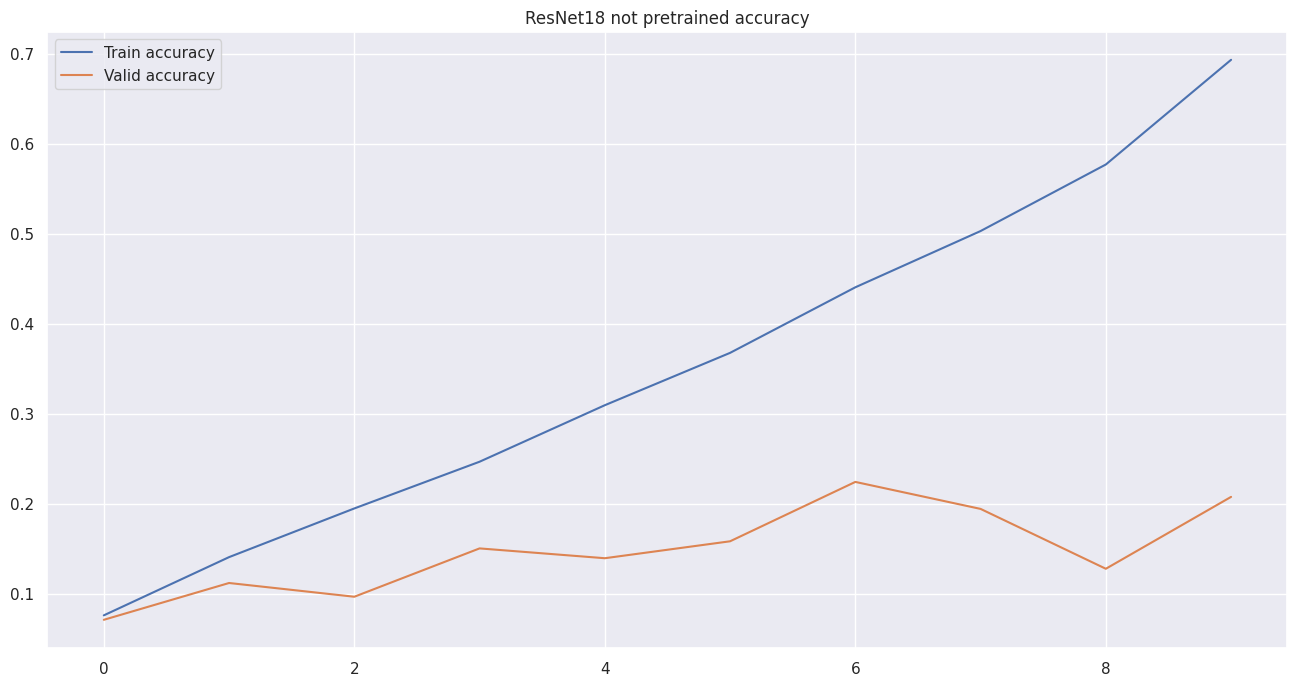

In [86]:
model = model.to(device)


optimizer = Adam(model.parameters(), lr=1e-3)

fit(
    model,
    train_loader, valid_loader,
    optimizer, loss_fn, device, 10, 'ResNet18 not pretrained'
)

In [ ]:
torch.save(model.state_dict(), 'resnet.pt')

In [ ]:
model = resnet18(pretrained=False)

In [ ]:
model.load_state_dict(torch.load('resnet.pt'))

In [ ]:
torch.save(
    {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict()
    },
    'checkpoint.pt'
)